In [ ]:
from sqlalchemy import create_engine, text, inspect, Table
import requests as rq
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as sts




In [ ]:
# Import the data for the API and transform it into daile average

url = 'https://archive-api.open-meteo.com/v1/archive'  # API url

parameters = {            # parameters to download the information
    'latitude': 45.4642,
    'longitude': 9.1895,
    'start_date': '2020-01-01',
    'end_date': '2024-09-30',
    'time_zone': 'Europe/Berlin',
    'hourly': 'temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,cloud_cover,wind_speed_10m,wind_speed_100m'
}

response = rq.get(url, params=parameters)
data = response.json()

# Print the coordenates from the weather station

print(f"Coordinates {data.get('latitude', 'No latitude provided')}°N {data.get('longitude', 'No longitud provided')}°E")
print(f"Timezone {parameters['time_zone']}")

weather = pd.DataFrame(data['hourly']) # create the dataframe weather form the information of hourly in the dictionary
weather.head()

weather['time']= pd.to_datetime(weather['time']) # convert column 'time' from string to date/time format
weather['day']= weather['time'].dt.date   # create a new column with the date values
daily_average_weather = weather.groupby('day').mean().reset_index() # group all the data in each column by the daily mean
daily_average_weather.head()

Coordinates 45.448154°N 9.169279°E
Timezone Europe/Berlin


,day,time,temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,cloud_cover,wind_speed_10m,wind_speed_100m
0,2020-01-01,2020-01-01 11:30:00,0.900000,83.916667,-2.570833,0.0,0.000000,7.733333,13.258333
1,2020-01-02,2020-01-02 11:30:00,0.275000,78.708333,-3.154167,0.0,2.625000,5.929167,8.658333
2,2020-01-03,2020-01-03 11:30:00,1.408333,82.291667,-1.900000,0.0,28.791667,6.787500,13.833333
3,2020-01-04,2020-01-04 11:30:00,4.166667,72.583333,0.550000,0.0,6.833333,9.787500,20.412500
4,2020-01-05,2020-01-05 11:30:00,5.325000,66.416667,1.795833,0.0,0.666667,9.008333,17.870833


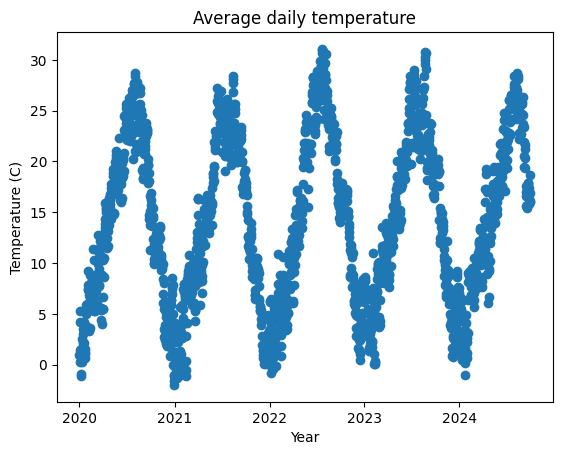

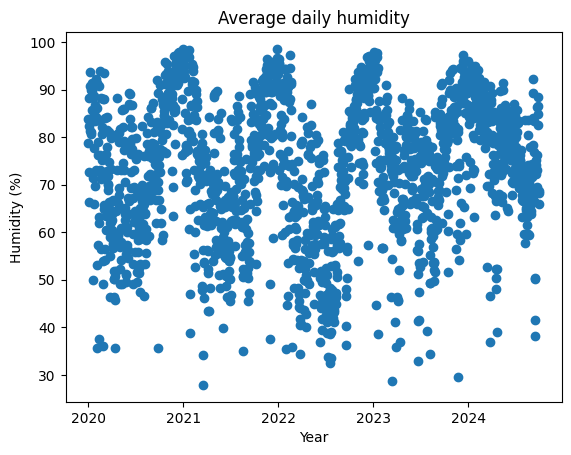

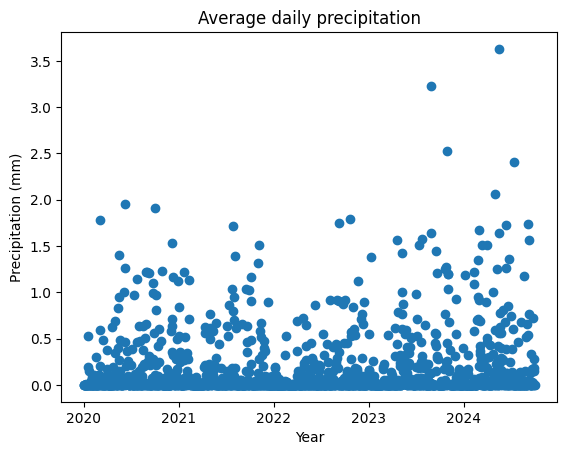

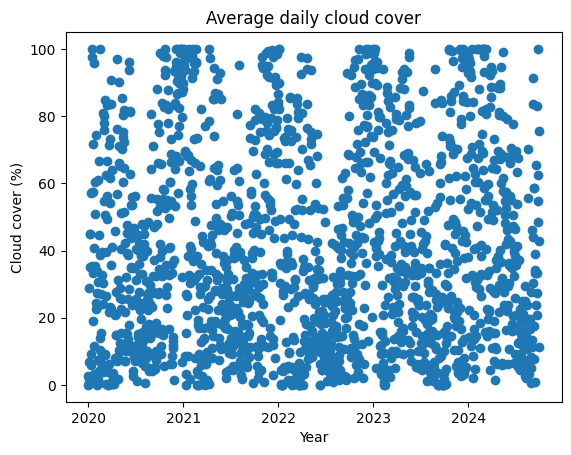

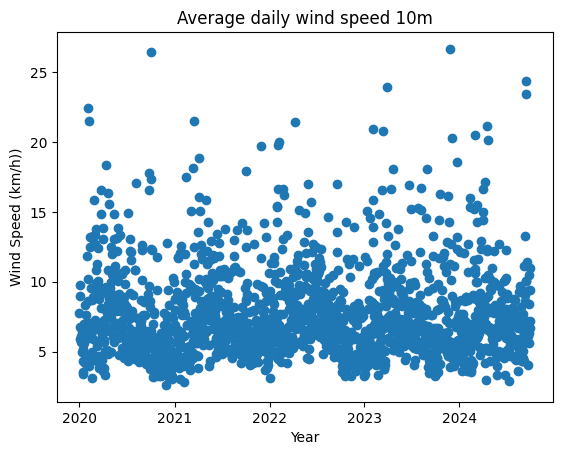

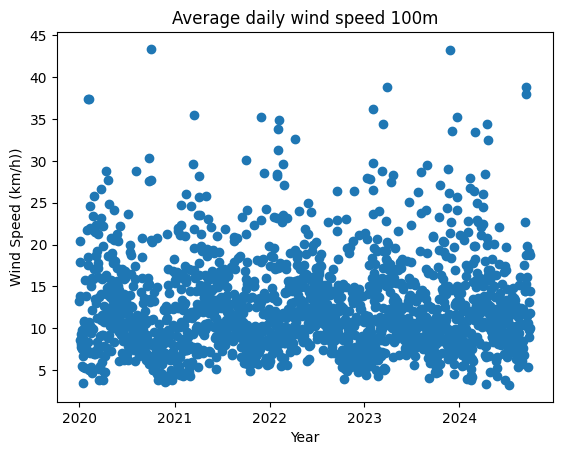

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plots

# Temperature
plt.scatter(daily_average_weather['day'],daily_average_weather['temperature_2m'])
plt.xlabel('Year')
plt.ylabel('Temperature (C)')
plt.title('Average daily temperature')
plt.show()
plt.clf()

# Humidity
plt.scatter(daily_average_weather['day'],daily_average_weather['relative_humidity_2m'])
plt.xlabel('Year')
plt.ylabel('Humidity (%)')
plt.title('Average daily humidity')
plt.show()
plt.clf()

# Precipitation
plt.scatter(daily_average_weather['day'],daily_average_weather['precipitation'])
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.title('Average daily precipitation')
plt.show()
plt.clf()

# Cloud cover
plt.scatter(daily_average_weather['day'],daily_average_weather['cloud_cover'])
plt.xlabel('Year')
plt.ylabel('Cloud cover (%)')
plt.title('Average daily cloud cover')
plt.show()
plt.clf()

# Wind speed
plt.scatter(daily_average_weather['day'],daily_average_weather['wind_speed_10m'])
plt.xlabel('Year')
plt.ylabel('Wind Speed (km/h))')
plt.title('Average daily wind speed 10m')
plt.show()
plt.clf()

# Wind speed
plt.scatter(daily_average_weather['day'],daily_average_weather['wind_speed_100m'])
plt.xlabel('Year')
plt.ylabel('Wind Speed (km/h))')
plt.title('Average daily wind speed 100m')
plt.show()
plt.clf()

In [ ]:
# Statistics measures

Temperature ={
    'mean':sts.mean(daily_average_weather['temperature_2m']),
    'max': max(daily_average_weather['temperature_2m']),
    'min': min(daily_average_weather['temperature_2m']),
    'standard_deviation': sts.stdev(daily_average_weather['temperature_2m'])
}

Humidity = {
    'mean':sts.mean(daily_average_weather['relative_humidity_2m']),
    'max': max(daily_average_weather['relative_humidity_2m']),
    'min': min(daily_average_weather['relative_humidity_2m']),
    'standard_deviation': sts.stdev(daily_average_weather['relative_humidity_2m'])
}

Precipitation = {
    'mean':sts.mean(daily_average_weather['precipitation']),
    'max': max(daily_average_weather['precipitation']),
    'min': min(daily_average_weather['precipitation']),
    'standard_deviation': sts.stdev(daily_average_weather['precipitation'])
}
Cloud_cover = {
    'mean':sts.mean(daily_average_weather['cloud_cover']),
    'max': max(daily_average_weather['cloud_cover']),
    'min': min(daily_average_weather['cloud_cover']),
    'standard_deviation': sts.stdev(daily_average_weather['cloud_cover'])
}
Wind_speed_10m = {
    'mean':sts.mean(daily_average_weather['wind_speed_10m']),
    'max': max(daily_average_weather['wind_speed_10m']),
    'min': min(daily_average_weather['wind_speed_10m']),
    'standard_deviation': sts.stdev(daily_average_weather['wind_speed_10m'])
}
Wind_speed_100m = {
    'mean':sts.mean(daily_average_weather['wind_speed_100m']),
    'max': max(daily_average_weather['wind_speed_100m']),
    'min': min(daily_average_weather['wind_speed_100m']),
    'standard_deviation': sts.stdev(daily_average_weather['wind_speed_100m'])
}

for key, value in Temperature.items():
   print('Temperature ' + key + ': ' + str(value))

for key, value in Humidity.items():
   print('Humidity ' + key + ': ' + str(value))

for key, value in Precipitation.items():
   print('Precipitation ' + key + ': ' + str(value))

for key, value in Cloud_cover.items():
   print('Cloud cover ' + key + ': ' + str(value))

for key, value in Wind_speed_10m.items():
   print('Wind speed 10m ' + key + ': ' + str(value))

for key, value in Wind_speed_100m.items():
   print('Wind speed 100m ' + key + ': ' + str(value))


Temperature mean: 14.212058117195005
Temperature max: 31.079166666666666
Temperature min: -2.0
Temperature standard_deviation: 8.09091056623135
Humidity mean: 73.17610470701248
Humidity max: 98.58333333333333
Humidity min: 27.875
Humidity standard_deviation: 14.502761646541018
Precipitation mean: 0.1401248799231508
Precipitation max: 3.6291666666666664
Precipitation min: 0.0
Precipitation standard_deviation: 0.3304788516698296
Cloud cover mean: 39.84293948126801
Cloud cover max: 100.0
Cloud cover min: 0.0
Cloud cover standard_deviation: 29.768646211987704
Wind speed 10m mean: 7.615283381364073
Wind speed 10m max: 26.670833333333334
Wind speed 10m min: 2.6083333333333334
Wind speed 10m standard_deviation: 3.212232913588369
Wind speed 100m mean: 12.390799711815562
Wind speed 100m max: 43.35833333333333
Wind speed 100m min: 3.25
Wind speed 100m standard_deviation: 5.683469998657571
